# Evaluation

## 1. Setup

### 1.1 Import required libraries

In [1]:
import os
import sys
import glob
import numpy as np
import image_preprocessing
import cnn
import bayesian_network
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

%matplotlib inline  

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Using TensorFlow backend.


### 1.2 Function to plot the confusion matrix

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 1.3 Function to classify an image

In [7]:
classes = {"Positive": 0, "Neutral": 1, "Negative": 2, "None": 3}
def classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list):
    with open('val_labels.json', mode='r', encoding='utf-8') as f:
        image_labels_dict = json.load(f)
    labels = image_labels_dict[image_name]

    print("RadhaKrishna")
#     print(labels)

    # preprocess the image
    image_preprocessing.preprocess(image_folder_path, image_name)

    # get mean cnn predictions for the faces from the image
    cnn_label, cnn_dict, faces_detected = cnn.predict_image(cnn_model, image_folder_path + "Aligned/", image_name)

    # get the bayesian and bayesian + cnn predictions for the image
    bayesian_label, bayesian_cnn_label, emotion_dict, emotion_cnn_dict = bayesian_network.inference(bayesian_model, labels_list, labels, cnn_label)

#     print("Faces detected: " + str(faces_detected))
#     print("Real Label: " + str(real_label))
#     print("CNN Label: " + str(cnn_label))
    print("Bayesian Label: " + str(bayesian_label))
#     print("Bayesian + CNN Label: " + str(bayesian_cnn_label))

    return classes[real_label], classes[str(cnn_label)], classes[str(bayesian_label)], classes[str(bayesian_cnn_label)], faces_detected

### 1.4 Load the CNN and bayesian model

In [8]:
print("RadhaKrishna")
cnn_model = cnn.load_model()
bayesian_model, labels_list = bayesian_network.load_model()

RadhaKrishna
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Loaded CNN model from disk
True


### 1.5 Function to evaluate the test data

In [5]:
def evaluate(image_folder_path, real_label):
    print("RadhaKrishna")
    predictions = []
    i = 0
    for file in sorted(glob.glob(image_folder_path + "*.jpg")):
        image_name = (file.split('/'))[-1]
        print("Image: " + image_name)
        prediction = {"Image": image_name}
        prediction["Actual"], prediction["CNN"], prediction["Bayesian"], prediction["Bayesian + CNN"], prediction["Faces Detected"] = classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list)
        predictions.append(prediction)
        i+=1
        if (i==100): 
            break
    return predictions

---

## 2. Evaluation

### 2.1 Perform evaluations on the validation dataset

In [ ]:
class_list = ['Positive', 'Neutral', 'Negative']
predictions_list = []
for emotion_class in class_list:
    predictions = evaluate('input/val/' + emotion_class + '/', emotion_class)
    predictions_list += predictions
df = pd.DataFrame(predictions_list)
df.head()

RadhaKrishna
Image: pos_1.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_10.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_100.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1000.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1001.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1002.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1003.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1004.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1005.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1006.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1007.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1008.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1009.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_101.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1010.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1011.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1012.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos

/anaconda3/envs/venv/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:377: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


Bayesian Label: Positive
Image: pos_1024.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1025.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1026.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1027.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1028.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1029.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_103.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1030.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1031.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1032.jpg
RadhaKrishna
Bayesian Label: Positive
Image: pos_1033.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1034.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1035.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1036.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1037.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1038.jpg
RadhaKrishna
Bayesian Label: Neutral
Image: pos_1039.jpg
RadhaKrishna
Bayesian Label: Neutra

### 2.2 Save the results to a file

In [ ]:
df.to_pickle('predictions_300')

---

## 3. Analyse the results

### 3.1 Read the results from the file

In [3]:
df = pd.read_pickle('predictions_1_2_3_4')

### 3.2 Extract predictions from the dataframe

In [4]:
y_true = df[["Actual"]]
y_pred_cnn = df[["CNN"]]
y_pred_bayesian = df[["Bayesian"]]
y_pred_bayesian_cnn = df[["Bayesian + CNN"]]

In [5]:
df.head()

,Actual,Bayesian,Bayesian + CNN,CNN,Faces Detected,Image
0,0,1,0,0,True,pos_1.jpg
1,0,0,0,0,True,pos_10.jpg
2,0,1,0,0,True,pos_100.jpg
3,0,0,0,1,True,pos_1000.jpg
4,0,1,1,0,True,pos_1001.jpg


### 3.3 Plot the confusion matrix for CNN

Confusion matrix, without normalization
[[1473  152   55   67]
 [ 225  771  261  111]
 [ 253  351  549   78]
 [   0    0    0    0]]


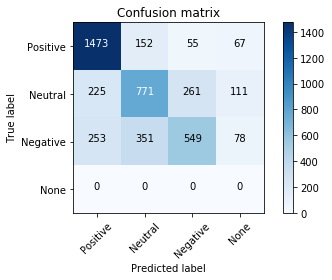

In [18]:
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

### 3.4 Plot the confusion matrix for Bayesian network

Confusion matrix, without normalization
[[989 654 104]
 [209 882 277]
 [145 304 782]]


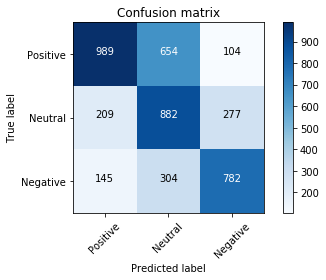

In [15]:
cm = confusion_matrix(y_true, y_pred_bayesian)
plt.figure()
plot_confusion_matrix(cm, classes={"Positive": 0, "Neutral": 1, "Negative": 2})
plt.show()

### 3.5 Plot the confusion matrix for Bayesian network + CNN

Confusion matrix, without normalization
[[1128  531   88]
 [ 185  902  281]
 [ 122  302  807]]


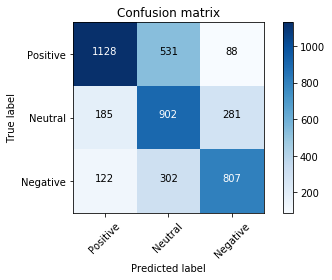

In [16]:
cm = confusion_matrix(y_true, y_pred_bayesian_cnn)
plt.figure()
plot_confusion_matrix(cm, classes={"Positive": 0, "Neutral": 1, "Negative": 2})
plt.show()

### 3.6 CNN Accuracy

In [12]:
accuracy_score(y_true, y_pred_cnn)

0.6426599171652094

### 3.7 Bayesian Network Accuracy

In [13]:
accuracy_score(y_true, y_pred_bayesian)

0.6104463874827427

### 3.8 Bayesian + CNN Accuracy

In [14]:
accuracy_score(y_true, y_pred_bayesian_cnn)

0.6527841693511275